In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import tensorflow as tf
import scipy.stats as stat
import pylab

In [29]:
digitalCurrencyDataFrame = pd.read_excel("digital_currency_data.xlsx")
digitalCurrencyDataFrame['Date'] = pd.to_datetime(digitalCurrencyDataFrame['Date'])
digitalCurrencyDataFrame.set_index('Date', inplace= True)
digitalCurrencyDataFrame.sort_values(by='Date', ascending=True, inplace=True)
digitalCurrencyDataFrame.head()

,open_USD,high_USD,low_USD,close_USD,volume,open_SAR,high_SAR,low_SAR,close_SAR
Date,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,40730301359,108673.200021,110946.877635,107959.467532,110098.022278
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,67865420765,110106.653216,124269.554676,109037.412446,120417.044896
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,78665235202,120425.068228,129717.236109,120136.118464,122871.152314
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,81163475344,122979.569785,125338.151237,107656.506220,119834.760354
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,67547324782,119853.976820,129076.423702,113272.816717,127407.907374


In [30]:
digitalCurrencyDataFrame.columns

Index(['open_USD', 'high_USD', 'low_USD', 'close_USD', 'volume', 'open_SAR',
       'high_SAR', 'low_SAR', 'close_SAR'],
      dtype='object')

In [31]:
print(digitalCurrencyDataFrame.dtypes)

open_USD     float64
high_USD     float64
low_USD      float64
close_USD    float64
volume         int64
open_SAR     float64
high_SAR     float64
low_SAR      float64
close_SAR    float64
dtype: object


In [32]:
digitalCurrencyDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2021-01-01 to 2023-12-30
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open_USD   1094 non-null   float64
 1   high_USD   1094 non-null   float64
 2   low_USD    1094 non-null   float64
 3   close_USD  1094 non-null   float64
 4   volume     1094 non-null   int64  
 5   open_SAR   1094 non-null   float64
 6   high_SAR   1094 non-null   float64
 7   low_SAR    1094 non-null   float64
 8   close_SAR  1094 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 85.5 KB


In [33]:
# Check for null values in the entire DataFrame
null_counts = digitalCurrencyDataFrame.isnull().sum()
print(null_counts)

open_USD     0
high_USD     0
low_USD      0
close_USD    0
volume       0
open_SAR     0
high_SAR     0
low_SAR      0
close_SAR    0
dtype: int64


In [34]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

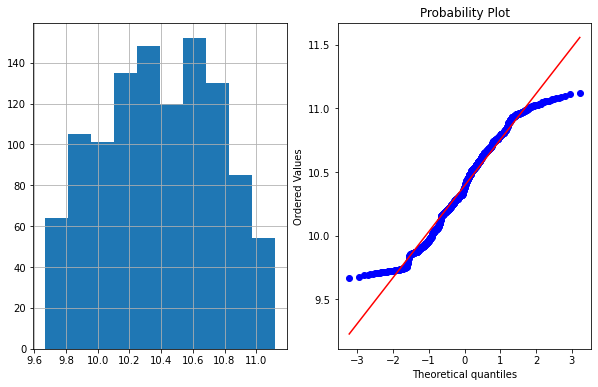

In [35]:
digitalCurrencyDataFrame["New_close_USD"] = np.log(digitalCurrencyDataFrame['close_USD'])

plot_data(digitalCurrencyDataFrame,"New_close_USD")

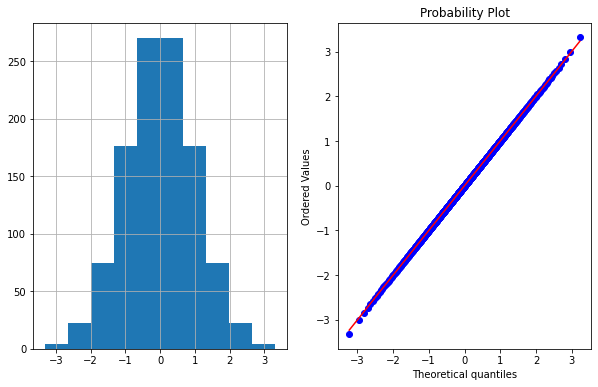

In [36]:
from scipy.stats import norm

ranks = digitalCurrencyDataFrame['close_USD'].rank()
digitalCurrencyDataFrame["New_close_USD_ranknorm"] = norm.ppf((ranks - 0.5) / len(ranks))

plot_data(digitalCurrencyDataFrame,"New_close_USD_ranknorm")

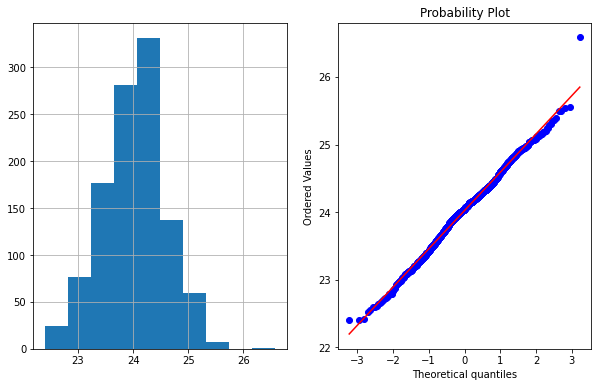

In [37]:
digitalCurrencyDataFrame["New_Volume"] = np.log(digitalCurrencyDataFrame['volume'])
plot_data(digitalCurrencyDataFrame,"New_Volume")

In [38]:
digitalCurrencyDataFrame.describe()

,open_USD,high_USD,low_USD,close_USD,volume,open_SAR,high_SAR,low_SAR,close_SAR,New_close_USD,New_close_USD_ranknorm,New_Volume
count,1094.000000,1094.000000,1094.000000,1094.000000,1.094000e+03,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1.094000e+03,1094.000000
mean,34816.501426,35609.056353,33945.907114,34824.583051,3.182073e+10,130496.632033,133467.227711,127233.534910,130526.922978,10.392498,-2.332077e-16,24.023434
std,12564.754014,12925.612685,12135.498975,12559.810038,2.053814e+10,47094.280412,48446.824158,45485.378468,47075.749766,0.365308,9.998620e-01,0.566625
min,15782.300781,16253.047852,15599.046875,15787.284180,5.331173e+09,59154.050904,60918.470208,58467.192185,59172.729309,9.666960,-3.315719e+00,22.396837
25%,24672.751953,25202.898438,24250.744141,24667.476562,1.865285e+10,92476.581533,94463.637322,90894.843106,92456.808705,10.113239,-6.737713e-01,23.649265
50%,32134.140625,33309.777344,30855.880859,32156.772461,2.785139e+10,120442.805941,124849.240419,115651.727359,120527.632912,10.378378,6.960578e-17,24.050149
75%,43546.506836,44214.342773,42581.432617,43558.212891,3.855213e+10,163217.791739,165720.924938,159600.572028,163261.667506,10.681854,6.737713e-01,24.375276
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,253184.911451,257832.177661,248808.330210,253248.980978,11.120872,3.315719e+00,26.583961


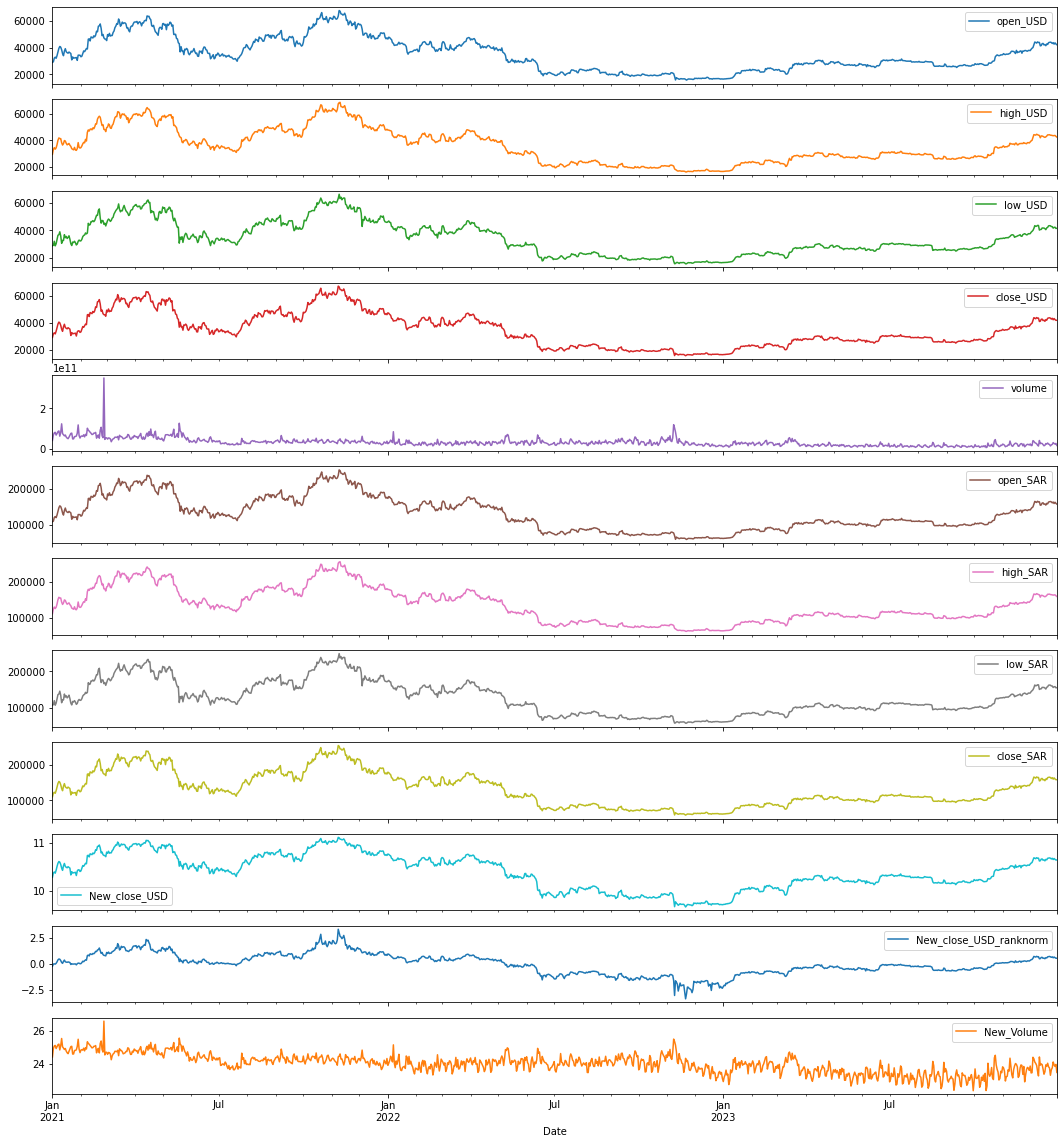

In [39]:
digitalCurrencyDataFrame.plot(figsize=(18,20),subplots=True)
plt.savefig('digital_currency_subplot.png')
plt.show()


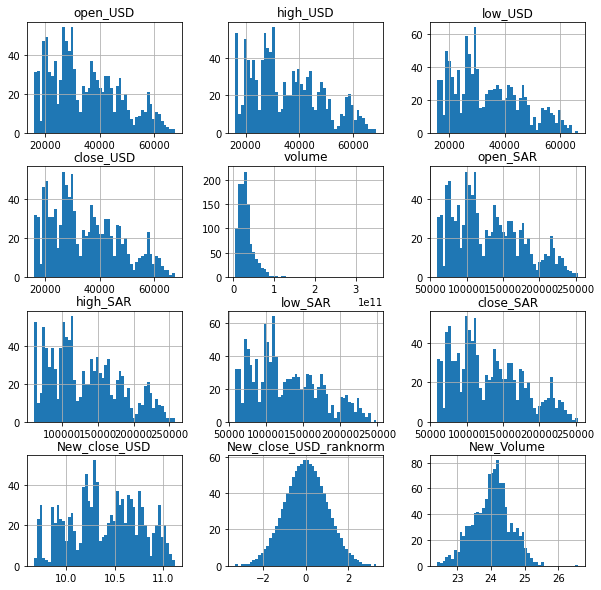

In [40]:
digitalCurrencyDataFrame.hist(figsize=(10,10),bins=50)
plt.savefig('digital_currency_subplot1.png')

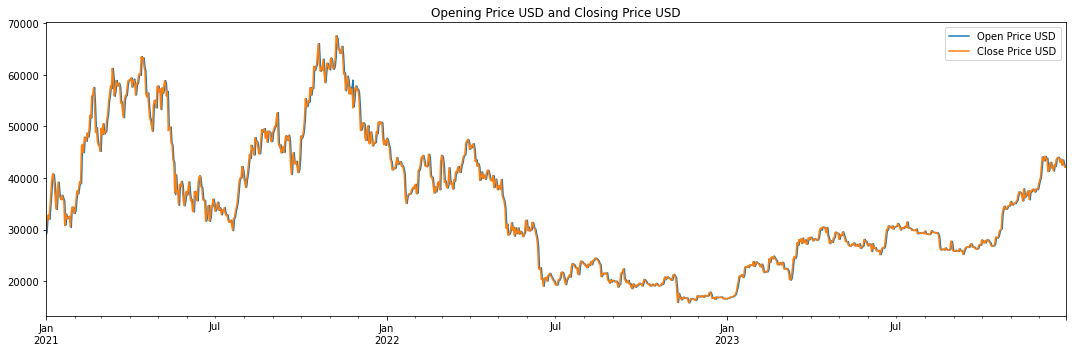

In [41]:
plt.figure(figsize=(15, 5))
digitalCurrencyDataFrame['open_USD'].plot()
digitalCurrencyDataFrame['close_USD'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Opening Price USD and Closing Price USD")
plt.legend(['Open Price USD', 'Close Price USD'])
plt.tight_layout()
plt.savefig('digital_currency_plot1.png')
plt.show()

In [12]:
digitalCurrencyDataFrame.describe()

,open_USD,high_USD,low_USD,close_USD,volume,open_SAR,high_SAR,low_SAR,close_SAR,New_Volume
count,1094.000000,1094.000000,1094.000000,1094.000000,1.094000e+03,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,34816.501426,35609.056353,33945.907114,34824.583051,3.182073e+10,130496.632033,133467.227711,127233.534910,130526.922978,24.023434
std,12564.754014,12925.612685,12135.498975,12559.810038,2.053814e+10,47094.280412,48446.824158,45485.378468,47075.749766,0.566625
min,15782.300781,16253.047852,15599.046875,15787.284180,5.331173e+09,59154.050904,60918.470208,58467.192185,59172.729309,22.396837
25%,24672.751953,25202.898438,24250.744141,24667.476562,1.865285e+10,92476.581533,94463.637322,90894.843106,92456.808705,23.649265
50%,32134.140625,33309.777344,30855.880859,32156.772461,2.785139e+10,120442.805941,124849.240419,115651.727359,120527.632912,24.050149
75%,43546.506836,44214.342773,42581.432617,43558.212891,3.855213e+10,163217.791739,165720.924938,159600.572028,163261.667506,24.375276
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,253184.911451,257832.177661,248808.330210,253248.980978,26.583961


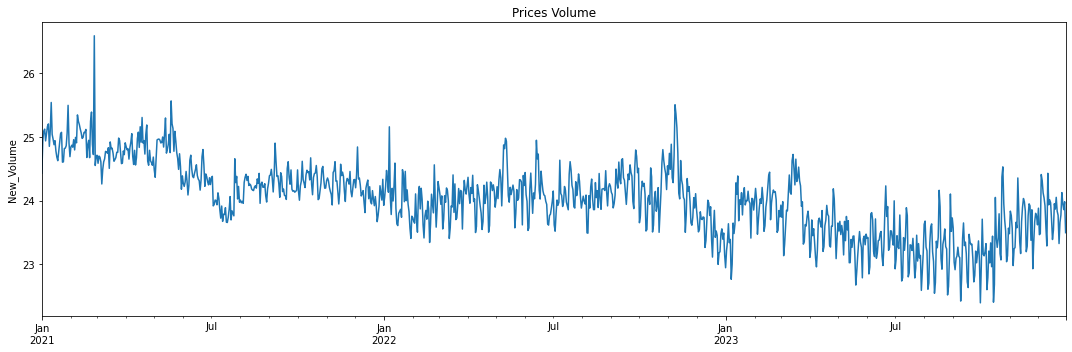

In [11]:
plt.figure(figsize=(15, 5))
digitalCurrencyDataFrame['New_Volume'].plot()
plt.ylabel('New_Volume')
plt.xlabel(None)
plt.title("Prices Volume")
plt.tight_layout()
plt.savefig('digital_currency_plot2.png')
plt.show()

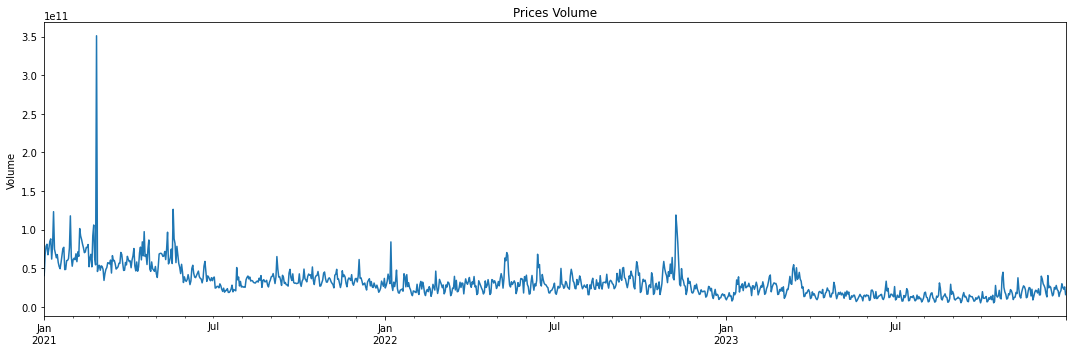

In [10]:
plt.figure(figsize=(15, 5))
digitalCurrencyDataFrame['volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Prices Volume")
plt.tight_layout()
plt.savefig('digital_currency_plot2.png')
plt.show()

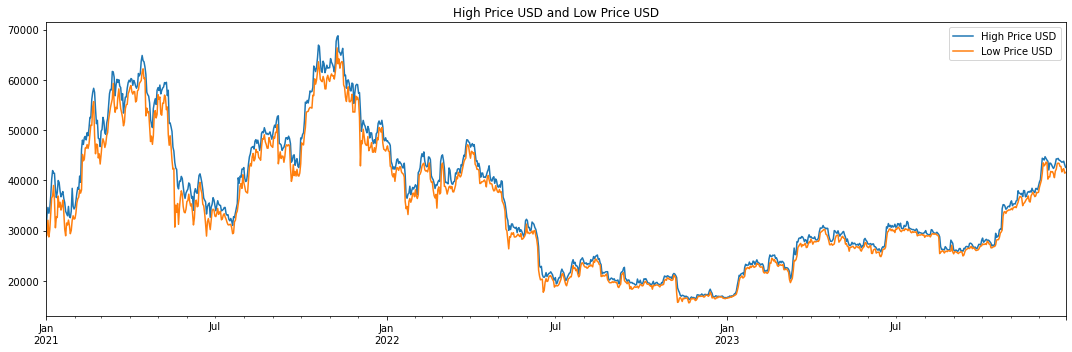

In [11]:
plt.figure(figsize=(15, 5))
digitalCurrencyDataFrame['high_USD'].plot()
digitalCurrencyDataFrame['low_USD'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("High Price USD and Low Price USD")
plt.legend(['High Price USD', 'Low Price USD'])
plt.tight_layout()
plt.savefig('digital_currency_plot3.png')
plt.show()

In [22]:
numberOfColumns = 1
closeUsdDataset = digitalCurrencyDataFrame['New_close_USD']
closeUsdDataset = pd.DataFrame(closeUsdDataset)
closeUsdDatasetValues = closeUsdDataset.values

closeUsdDatasetValues.shape

(1094, 1)

In [23]:
scaler = MinMaxScaler(feature_range= (0, 1))
scaledData = scaler.fit_transform(np.array(closeUsdDatasetValues))

In [24]:
trainDataSize = int(len(closeUsdDatasetValues) * 0.75)
testDataSize = len(closeUsdDatasetValues) - trainDataSize
print("Train Size :",trainDataSize,"Test Size :",testDataSize)

Train Size : 820 Test Size : 274


In [13]:
numberOfColumns = 1
closeUsdDataset = digitalCurrencyDataFrame['close_USD']
closeUsdDataset = pd.DataFrame(closeUsdDataset)
closeUsdDatasetValues = closeUsdDataset.values

closeUsdDatasetValues.shape

(1094, 1)

In [13]:
scaler = MinMaxScaler(feature_range= (0, 1))
scaledData = scaler.fit_transform(np.array(closeUsdDatasetValues))a

In [14]:
trainDataSize = int(len(closeUsdDatasetValues) * 0.75)
testDataSize = len(closeUsdDatasetValues) - trainDataSize
print("Train Size :",trainDataSize,"Test Size :",testDataSize)

Train Size : 820 Test Size : 274


<Figure size 432x288 with 0 Axes>

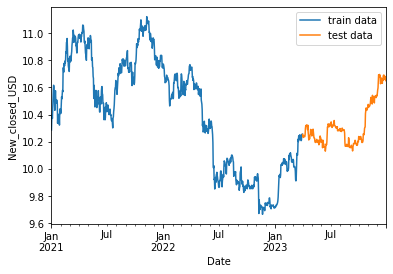

In [25]:
plt.figure()
ax = closeUsdDataset.iloc[0:trainDataSize, :].plot()
closeUsdDataset.iloc[trainDataSize:, :].plot(ax=ax)
plt.legend(['train data', 'test data'])
plt.ylabel('New_closed_USD')
plt.show()


In [26]:
trainingData = scaledData[0:trainDataSize, :]
xTraining = []
yTraining = []
timeSteps = 60
numberOfColumns = 1

for i in range(timeSteps, len(trainingData)):
    xTraining.append(trainingData[i-timeSteps:i, :numberOfColumns])
    yTraining.append(trainingData[i, :numberOfColumns])

xTraining, yTraining = np.array(xTraining), np.array(yTraining)
xTraining = np.reshape(xTraining, (xTraining.shape[0], xTraining.shape[1], numberOfColumns))

In [27]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (xTraining.shape[1], numberOfColumns)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(numberOfColumns)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= ['mae'])

In [28]:
history = model.fit(xTraining, yTraining, validation_split=0.33, epochs= 20, batch_size= 32)

Epoch 1/20


16/16 [==============================] - 5s 85ms/step - loss: 0.1327 - mae: 0.2633 - val_loss: 0.0090 - val_mae: 0.0810
Epoch 2/20
16/16 [==============================] - 1s 38ms/step - loss: 0.0143 - mae: 0.0959 - val_loss: 0.0278 - val_mae: 0.1592
Epoch 3/20
16/16 [==============================] - 1s 39ms/step - loss: 0.0071 - mae: 0.0667 - val_loss: 0.0154 - val_mae: 0.1146
Epoch 4/20
16/16 [==============================] - 1s 38ms/step - loss: 0.0055 - mae: 0.0590 - val_loss: 0.0083 - val_mae: 0.0807
Epoch 5/20
16/16 [==============================] - 1s 39ms/step - loss: 0.0043 - mae: 0.0515 - val_loss: 0.0053 - val_mae: 0.0628
Epoch 6/20
16/16 [==============================] - 1s 41ms/step - loss: 0.0037 - mae: 0.0468 - val_loss: 0.0028 - val_mae: 0.0432
Epoch 7/20
16/16 [==============================] - 1s 41ms/step - loss: 0.0033 - mae: 0.0437 - val_loss: 0.0021 - val_mae: 0.0352
Epoch 8/20
16/16 [==============================] - 1s 44ms/step - loss: 0.0032 -

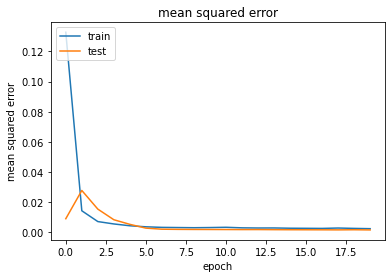

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('mean squared error')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
timeSteps = 60
testData = scaledData[trainDataSize - timeSteps:, :]

xTest = []
yTest = []
numberOfColumns = 1
for i in range(timeSteps, len(testData)):
    xTest.append(testData[i-timeSteps:i, 0:numberOfColumns])
    yTest.append(testData[i, 0:numberOfColumns])
xTest, yTest = np.array(xTest), np.array(yTest)
xTest = np.reshape(xTest, (xTest.shape[0], xTest.shape[1], numberOfColumns))

In [31]:
predictions = model.predict(xTest)
predictions = scaler.inverse_transform(predictions)
yTest = scaler.inverse_transform(yTest)

rmse = np.sqrt(np.mean(yTest - predictions)**2).round(2)
rmse

9/9 [==============================] - 1s 14ms/step


0.01

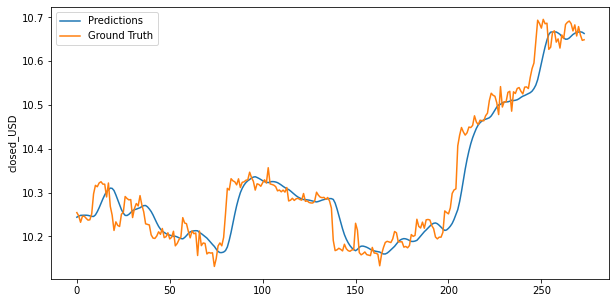

In [32]:
predictionActuals = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':yTest.flatten()})

plt.figure(figsize=(10, 5))
plt.plot(predictionActuals['Predictions'])
plt.plot(predictionActuals['Actuals'])
plt.legend(['Predictions', 'Ground Truth'])
plt.ylabel('closed_USD')
plt.savefig('digital_currency_comparison2.png')
plt.show()

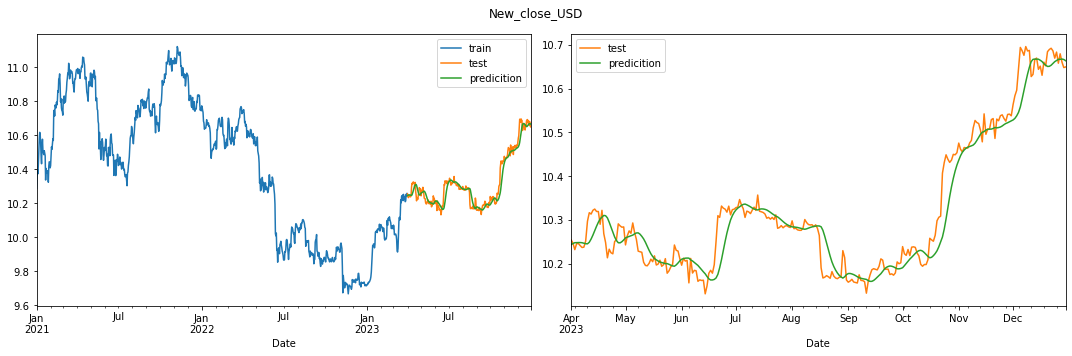

In [34]:
feature = 'New_close_USD'
i=0
train = closeUsdDataset.iloc[:trainDataSize , i:i+1]
test = closeUsdDataset.iloc[trainDataSize: , i:i+1]
test['Predictions'] = predictions[:, i]
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

train[feature].plot(ax=axes[0])
test[feature].plot(ax=axes[0])
test["Predictions"].plot(ax=axes[0])
axes[0].legend(['train', 'test', 'predicition'])

test[feature].plot(ax=axes[1], color='tab:orange')
test["Predictions"].plot(ax=axes[1], color='tab:green')
axes[1].legend(['test', 'predicition'])
plt.suptitle(feature)
plt.tight_layout()
plt.show()

#### END

#### Predictions for close_USD

In [ ]:
numberOfColumns = 1
closeUsdDataset = digitalCurrencyDataFrame['close_USD']
closeUsdDataset = pd.DataFrame(closeUsdDataset)
closeUsdDatasetValues = closeUsdDataset.values

closeUsdDatasetValues.shape

(1094, 1)

<Figure size 432x288 with 0 Axes>

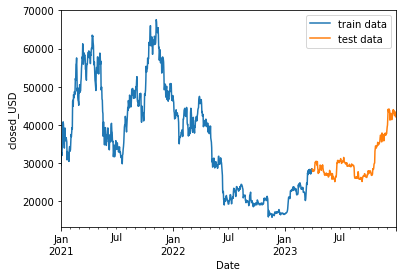

In [15]:
plt.figure()
ax = closeUsdDataset.iloc[0:trainDataSize, :].plot()
closeUsdDataset.iloc[trainDataSize:, :].plot(ax=ax)
plt.legend(['train data', 'test data'])
plt.ylabel('closed_USD')
plt.show()


In [16]:
trainingData = scaledData[0:trainDataSize, :]
xTraining = []
yTraining = []
timeSteps = 60
numberOfColumns = 1

for i in range(timeSteps, len(trainingData)):
    xTraining.append(trainingData[i-timeSteps:i, :numberOfColumns])
    yTraining.append(trainingData[i, :numberOfColumns])

xTraining, yTraining = np.array(xTraining), np.array(yTraining)
xTraining = np.reshape(xTraining, (xTraining.shape[0], xTraining.shape[1], numberOfColumns))


In [17]:
xTraining.shape , yTraining.shape

((760, 60, 1), (760, 1))

In [18]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (xTraining.shape[1], numberOfColumns)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(numberOfColumns)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= ['mae'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42465 (165.88 KB)
Trainable params: 42465 (165.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
history = model.fit(xTraining, yTraining, validation_split=0.33, epochs= 20, batch_size= 32)

Epoch 1/20


16/16 [==============================] - 10s 219ms/step - loss: 0.0737 - mae: 0.2019 - val_loss: 0.0085 - val_mae: 0.0852
Epoch 2/20
16/16 [==============================] - 2s 109ms/step - loss: 0.0134 - mae: 0.0947 - val_loss: 0.0142 - val_mae: 0.1150
Epoch 3/20
16/16 [==============================] - 2s 117ms/step - loss: 0.0080 - mae: 0.0725 - val_loss: 0.0101 - val_mae: 0.0961
Epoch 4/20
16/16 [==============================] - 2s 123ms/step - loss: 0.0061 - mae: 0.0627 - val_loss: 0.0029 - val_mae: 0.0483
Epoch 5/20
16/16 [==============================] - 2s 119ms/step - loss: 0.0050 - mae: 0.0554 - val_loss: 0.0010 - val_mae: 0.0267
Epoch 6/20
16/16 [==============================] - 2s 112ms/step - loss: 0.0048 - mae: 0.0527 - val_loss: 7.3185e-04 - val_mae: 0.0206
Epoch 7/20
16/16 [==============================] - 2s 99ms/step - loss: 0.0046 - mae: 0.0512 - val_loss: 7.1682e-04 - val_mae: 0.0207
Epoch 8/20
16/16 [==============================] - 2s 108ms/step 

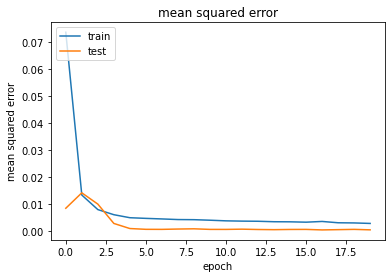

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('mean squared error')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

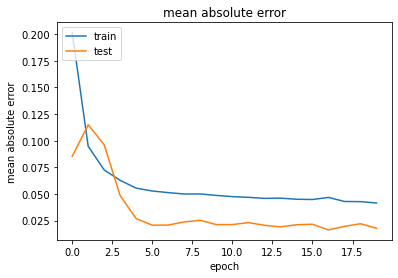

In [22]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('mean absolute error')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
timeSteps = 60
testData = scaledData[trainDataSize - timeSteps:, :]

xTest = []
yTest = []
numberOfColumns = 1
for i in range(timeSteps, len(testData)):
    xTest.append(testData[i-timeSteps:i, 0:numberOfColumns])
    yTest.append(testData[i, 0:numberOfColumns])
xTest, yTest = np.array(xTest), np.array(yTest)
xTest = np.reshape(xTest, (xTest.shape[0], xTest.shape[1], numberOfColumns))

In [24]:
xTest.shape , yTest.shape

((274, 60, 1), (274, 1))

In [25]:
predictions = model.predict(xTest)
predictions = scaler.inverse_transform(predictions)
yTest = scaler.inverse_transform(yTest)

rmse = np.sqrt(np.mean(yTest - predictions)**2).round(2)
rmse

9/9 [==============================] - 5s 56ms/step


196.5

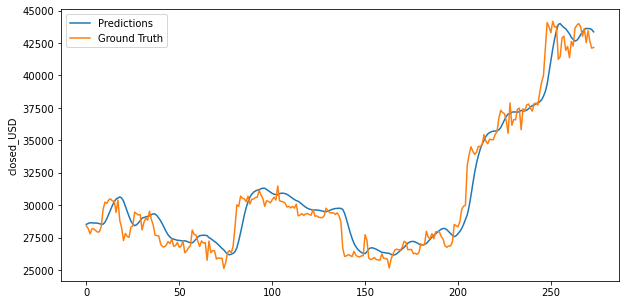

In [26]:
predictionActuals = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':yTest.flatten()})

plt.figure(figsize=(10, 5))
plt.plot(predictionActuals['Predictions'])
plt.plot(predictionActuals['Actuals'])
plt.legend(['Predictions', 'Ground Truth'])
plt.ylabel('closed_USD')
plt.savefig('digital_currency_comparison2.png')
plt.show()

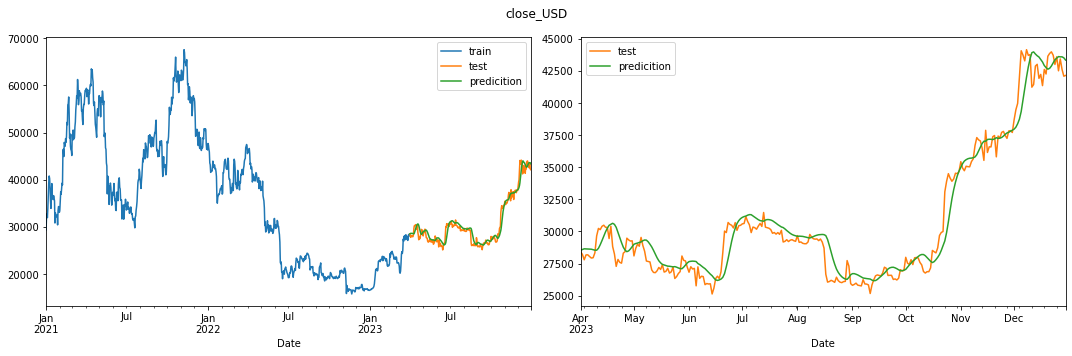

In [27]:
feature = 'close_USD'
i=0
train = closeUsdDataset.iloc[:trainDataSize , i:i+1]
test = closeUsdDataset.iloc[trainDataSize: , i:i+1]
test['Predictions'] = predictions[:, i]
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

train[feature].plot(ax=axes[0])
test[feature].plot(ax=axes[0])
test["Predictions"].plot(ax=axes[0])
axes[0].legend(['train', 'test', 'predicition'])

test[feature].plot(ax=axes[1], color='tab:orange')
test["Predictions"].plot(ax=axes[1], color='tab:green')
axes[1].legend(['test', 'predicition'])
plt.suptitle(feature)
plt.tight_layout()
plt.show()

#### End

## LSTM Multiple Feature

In [28]:
digitalCurrencyDataFrame.head()

,open_USD,high_USD,low_USD,close_USD,volume,open_SAR,high_SAR,low_SAR,close_SAR
Date,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,40730301359,108673.200021,110946.877635,107959.467532,110098.022278
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,67865420765,110106.653216,124269.554676,109037.412446,120417.044896
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,78665235202,120425.068228,129717.236109,120136.118464,122871.152314
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,81163475344,122979.569785,125338.151237,107656.506220,119834.760354
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,67547324782,119853.976820,129076.423702,113272.816717,127407.907374


In [29]:
numberOfColumns = 5
featureList = ['open_USD', 'high_USD', 'low_USD', 'close_USD', 'volume']
cols = list(digitalCurrencyDataFrame.loc[:, ['open_USD', 'high_USD', 'low_USD', 'close_USD', 'volume']])
dataset = digitalCurrencyDataFrame[cols]
dataset = pd.DataFrame(dataset)
data = dataset.values
data.shape

(1094, 5)

In [30]:
scaler = MinMaxScaler(feature_range= (0, 1))
scaledData = scaler.fit_transform(np.array(data))

In [31]:
trainDataSize = int(len(data) * 0.75)
testDataSize = len(data) - trainDataSize

print("Training Data Size :",trainDataSize,"Testing Data Size :",testDataSize)

Training Data Size : 820 Testing Data Size : 274


#### SLIDING WINDOW TECHNIQUE

In [32]:
trainingData = scaledData[0:trainDataSize, :]
xTraining = []
yTraining = []
timeSteps = 60
numberOfColumns = 5

for i in range(timeSteps, len(trainingData)):
    xTraining.append(trainingData[i-timeSteps:i, :numberOfColumns])
    yTraining.append(trainingData[i, :numberOfColumns])
xTraining, yTraining = np.array(xTraining), np.array(yTraining)
xTraining = np.reshape(xTraining, (xTraining.shape[0], xTraining.shape[1], numberOfColumns))

In [ ]:
numberOfColumns = 5

for i in range(timeSteps, len(trainingData)):
    xTraining.append(trainingData[i-timeSteps:i, :numberOfColumns])
    yTraining.append(trainingData[i, :numberOfColumns])
xTraining, yTraining = np.array(xTraining), np.array(yTraining)
xTraining = np.reshape(xTraining, (xTraining.shape[0], xTraining.shape[1], numberOfColumns))

In [33]:
model2 = Sequential([
    LSTM(50, return_sequences= True, input_shape= (xTraining.shape[1], numberOfColumns)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(numberOfColumns)
])


In [34]:
model2.compile(optimizer= 'adam', loss= 'mse' , metrics=['mae'])

In [35]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            11200     
                                                                 
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 5)                 85        
                                                                 
Total params: 43333 (169.27 KB)
Trainable params: 43333 (169.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
history2 = model2.fit(xTraining, yTraining, validation_split=0.33, epochs= 20, batch_size= 32)

Epoch 1/20
16/16 [==============================] - 9s 140ms/step - loss: 0.0613 - mae: 0.1743 - val_loss: 0.0044 - val_mae: 0.0538
Epoch 2/20
16/16 [==============================] - 1s 71ms/step - loss: 0.0097 - mae: 0.0757 - val_loss: 0.0057 - val_mae: 0.0669
Epoch 3/20
16/16 [==============================] - 2s 107ms/step - loss: 0.0059 - mae: 0.0592 - val_loss: 0.0030 - val_mae: 0.0453
Epoch 4/20
16/16 [==============================] - 2s 99ms/step - loss: 0.0048 - mae: 0.0534 - val_loss: 0.0017 - val_mae: 0.0319
Epoch 5/20
16/16 [==============================] - 2s 111ms/step - loss: 0.0043 - mae: 0.0492 - val_loss: 0.0012 - val_mae: 0.0257
Epoch 6/20
16/16 [==============================] - 2s 106ms/step - loss: 0.0041 - mae: 0.0482 - val_loss: 0.0010 - val_mae: 0.0244
Epoch 7/20
16/16 [==============================] - 2s 107ms/step - loss: 0.0038 - mae: 0.0457 - val_loss: 9.7136e-04 - val_mae: 0.0234
Epoch 8/20
16/16 [==============================] - 2s 116ms/step - loss: 

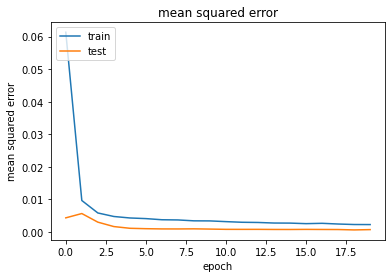

In [37]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('mean squared error')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

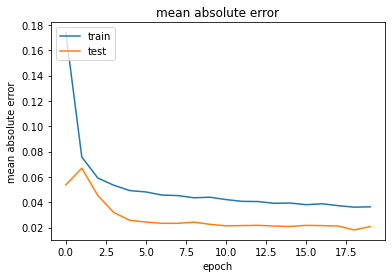

In [38]:
plt.plot(history2.history['mae'])
plt.plot(history2.history['val_mae'])
plt.title('mean absolute error')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
timeSteps = 60
testData = scaledData[trainDataSize - timeSteps:, :]
xTest = []
yTest = []
numberOfColumns = 5

for i in range(timeSteps, len(testData)):
    xTest.append(testData[i-timeSteps:i, 0:numberOfColumns])
    yTest.append(testData[i, 0:numberOfColumns])
xTest, yTest = np.array(xTest), np.array(yTest)
xTest = np.reshape(xTest, (xTest.shape[0], xTest.shape[1], numberOfColumns))

In [40]:
xTest.shape , yTest.shape

((274, 60, 5), (274, 5))

In [41]:
predictions = model2.predict(xTest)
predictions = scaler.inverse_transform(predictions)
yTest = scaler.inverse_transform(yTest)
for i in range(5):
  rmse = np.sqrt(np.mean(yTest[:, i] - predictions[:, i])**2).round(2)
  print(featureList[i], ' : ', rmse)


9/9 [==============================] - 1s 20ms/step
open_USD  :  437.4
high_USD  :  473.86
low_USD  :  68.47
close_USD  :  408.49
volume  :  4121418681.21


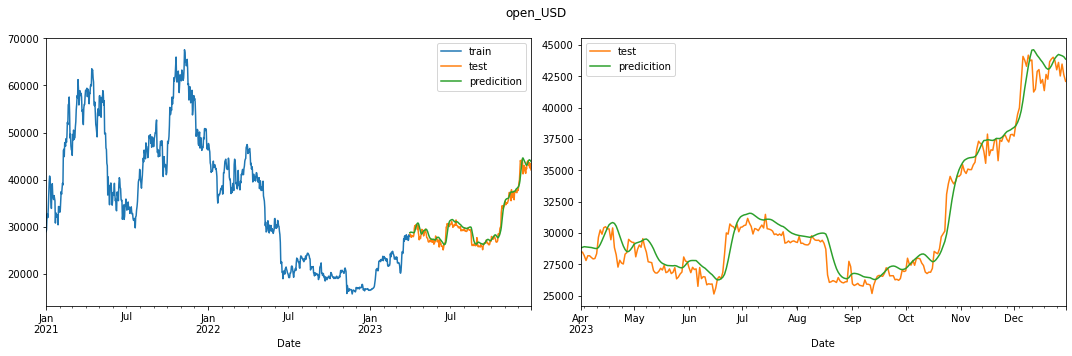

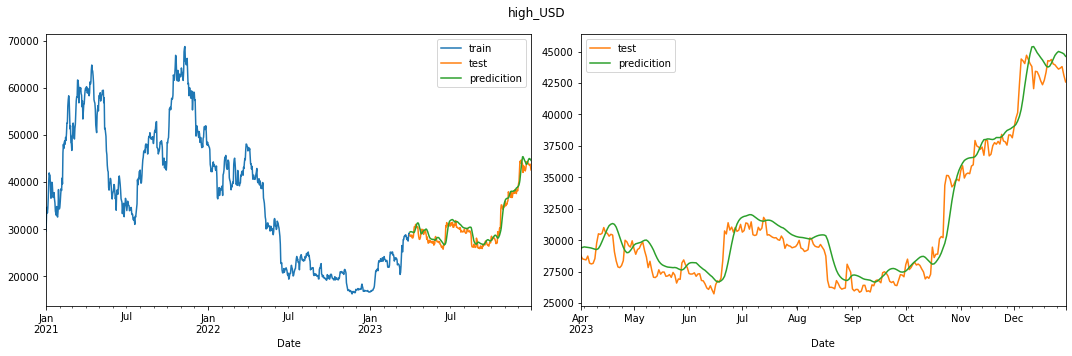

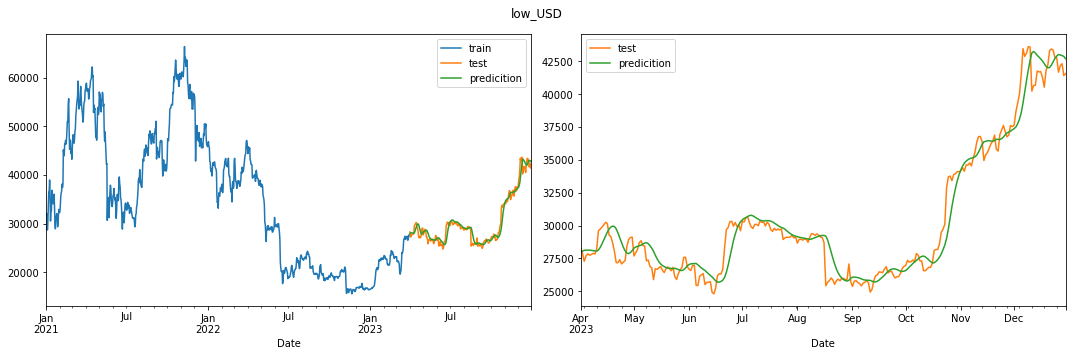

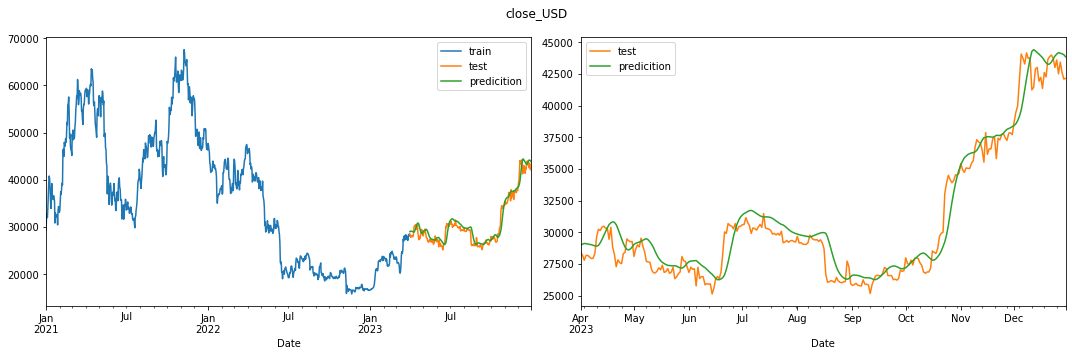

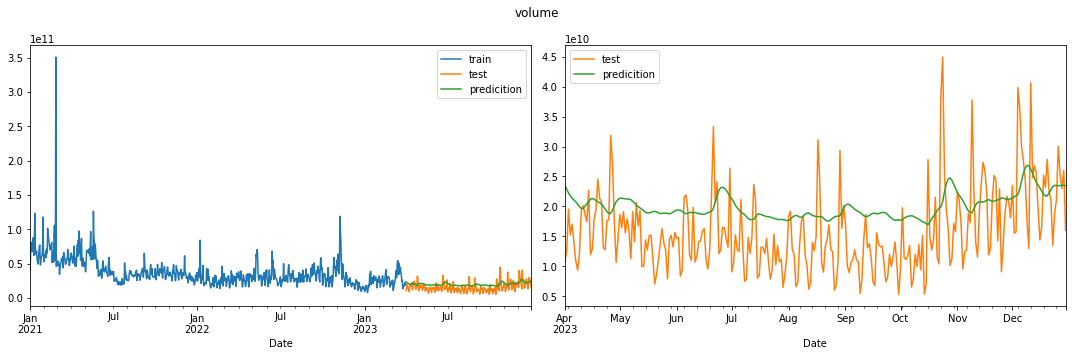

In [42]:
for i in range(5):
  feature = featureList[i]
  train = dataset.iloc[:trainDataSize , i:i+1]
  test = dataset.iloc[trainDataSize: , i:i+1]
  test['Predictions'] = predictions[:, i]
  fig, axes = plt.subplots(1, 2, figsize=(15, 5))

  train[feature].plot(ax=axes[0])
  test[feature].plot(ax=axes[0])
  test["Predictions"].plot(ax=axes[0])
  axes[0].legend(['train', 'test', 'predicition'])

  test[feature].plot(ax=axes[1], color='tab:orange')
  test["Predictions"].plot(ax=axes[1], color='tab:green')
  axes[1].legend(['test', 'predicition'])
  plt.suptitle(feature)
  plt.tight_layout()
  plt.show()